# Initial Setting

In [1]:
%matplotlib inline

import numpy as np
from pandas import DataFrame
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.datasets import cifar10

np.random.seed(20200426)
tf.random.set_seed(20200426)

print("tensorflow version : " + tf.__version__)

/home/nao/.pyenv/versions/3.7.5/envs/py37_tf2/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


tensorflow version : 2.0.0


# Create input data and deep learning laye

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=[0.8, 1.2],
    horizontal_flip=True,
    channel_shift_range=0.2)

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        input_shape=(32, 32, 3),
                        name='conv_filter1-1'))
model.add(layers.Conv2D(32, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter1-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling1'))
model.add(layers.Dropout(rate=0.25, name='dropout1'))

model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-1'))
model.add(layers.Conv2D(64, (3, 3), padding='same',
                        kernel_initializer=initializers.TruncatedNormal(),
                        use_bias=True, activation='relu',
                        name='conv_filter2-2'))
model.add(layers.MaxPooling2D((2, 2), name='max_pooling2'))
model.add(layers.Dropout(rate=0.25, name='dropout2'))

model.add(layers.Flatten(name='flatten'))
model.add(layers.Dense(512, activation='relu',
                       kernel_initializer=initializers.TruncatedNormal(),
                       name='hidden'))
model.add(layers.Dropout(rate=0.5, name='dropout3'))
model.add(layers.Dense(10, activation='softmax', name='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_filter1-1 (Conv2D)      (None, 32, 32, 32)        896       
_________________________________________________________________
conv_filter1-2 (Conv2D)      (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling1 (MaxPooling2D)  (None, 16, 16, 32)        0         
_________________________________________________________________
dropout1 (Dropout)           (None, 16, 16, 32)        0         
_________________________________________________________________
conv_filter2-1 (Conv2D)      (None, 16, 16, 64)        18496     
_________________________________________________________________
conv_filter2-2 (Conv2D)      (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2 (MaxPooling2D)  (None, 8, 8, 64)          0

# Trainning

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 9s 172us/sample - loss: 1.6641 - accuracy: 0.3883 - val_loss: 1.2393 - val_accuracy: 0.5552
Epoch 2/20
50000/50000 [==============================] - 7s 139us/sample - loss: 1.1896 - accuracy: 0.5756 - val_loss: 1.0136 - val_accuracy: 0.6378
Epoch 3/20
50000/50000 [==============================] - 7s 137us/sample - loss: 0.9979 - accuracy: 0.6465 - val_loss: 0.9325 - val_accuracy: 0.6732
Epoch 4/20
50000/50000 [==============================] - 6s 127us/sample - loss: 0.8839 - accuracy: 0.6882 - val_loss: 0.8431 - val_accuracy: 0.7029
Epoch 5/20
50000/50000 [==============================] - 6s 129us/sample - loss: 0.8070 - accuracy: 0.7139 - val_loss: 0.7549 - val_accuracy: 0.7342
Epoch 6/20
50000/50000 [==============================] - 7s 132us/sample - loss: 0.7302 - accuracy: 0.7431 - val_loss: 0.7139 - val_accuracy: 0.7483
Epoch 7/20
50000/50000 [==========================

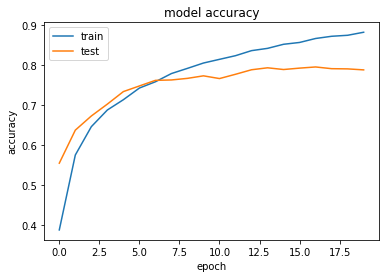

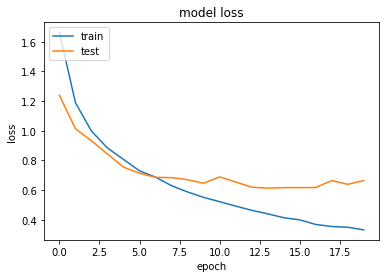

In [3]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=128, epochs=20)

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save the model

In [4]:
#model.save('models\\cnn_cifar10.h5')
model.save('models/cnn_cifar10.h5')

print(model.input)
print(model.output)

Tensor("conv_filter1-1_input:0", shape=(None, 32, 32, 3), dtype=float32)
Tensor("softmax/Identity:0", shape=(None, 10), dtype=float32)


# Predict

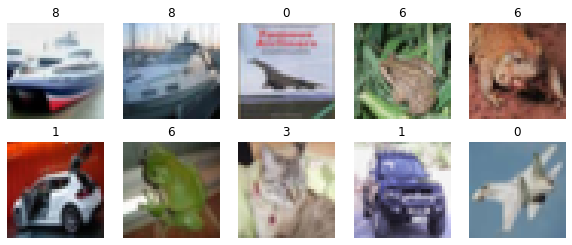

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

#model = models.load_model('models\\cnn_cifar10.h5')
model = models.load_model('models/cnn_cifar10.h5')

plt.figure(figsize=(10, 4))
num = 0

while num < 2 * 5:
    num += 1
    plt.subplot(2, 5, num)
    plt.imshow(x_test[num])
    plt.axis('off')
    
    x = x_test[num]
    x = x.reshape(1, 32, 32,3)
    plt.title(np.argmax(model.predict(x)))
    